In [18]:
import cv2
import numpy as np

fx = 1384.647695
cx = 959.066302
fy = 1384.696748
cy = 540.008542
camera_matrix = np.array([[fx, 0, cx], [0, fy, cy], [0, 0, 1]])  # 카메라 매트릭스 초기화

# 2D-image coordination
points_2D = np.array([
	# 3m area
	(361, 695),
	(618, 695),
	(873, 645),
	(1049, 645),
    (1293, 654),
    (1481, 654),
    (1819, 702),
    #1m area
    (55,793),
    (310,793),
    (497,757),
    (722,757),
    (823,794),
    (1088,794),
    (1231,767),
    (1471,767),
    (1548,752),
    (1776,752),
    
    (983, 751),
    (1628, 825),
    
	(222, 902),
    (957, 902),
], dtype="double")

# 3D-World coordinations correspond to 2D-image coordinations
points_3D = np.array([
	(2.5932, 1.0842, 0),
    (2.5668, 0.70819, 0),
	(3.77331, 0.20543, 0),
	(3.7944, -0.2993, 0),
	(3.5843, -0.88828, 0),
    (3.5597, -1.3907, 0),
    (2.5, -1.49, 0),
    
	(1.5879, 0.98852, 0),
    (1.5858, 0.71532, 0),
    (1.7205, 0.49851, 0),
    (1.7294, 0.2107, 0),
    (1.6262, 0.16944, 0),
    (1.4682, -0.2358, 0),
    (1.6417, -0.45515, 0),
    (1.636, -0.73643, 0),
    (1.7378, -0.87344, 0),
    (1.7185, -1.1506, 0),
    
	(1.8232, -0.10572, 0),
    (1.3562, -0.7, 0),
    
	(1.1166, 0.48393, 0),
    (1.0933, -0.080393, 0)
], dtype="double")

In [19]:
dist_coeffs = np.array([0, 0, 0, 0, 0])
 # using solvePnP to calculate R, t
retval, rvec, tvec = cv2.solvePnP(points_3D, points_2D, camera_matrix, dist_coeffs, rvec=None, tvec=None, useExtrinsicGuess=None, flags=None)

In [20]:
rvec

array([[ 1.21418319],
       [-1.19095043],
       [ 1.17409947]])

In [21]:
tvec

array([[-0.13813353],
       [ 0.28884489],
       [ 0.04034645]])

In [6]:
print(f"retval :{retval}, rvec: {rvec}, tvec :{tvec}")

retval :True, rvec: [[ 1.1539897 ]
 [-1.29744072]
 [ 1.31961733]], tvec :[[ 0.44848007]
 [ 0.27206959]
 [-0.12309928]]


In [5]:
rvec, _ = cv2.Rodrigues(rvec)

rvec

array([[-0.64675574, -0.76195998, -0.03352608],
       [-0.12838427,  0.06543267,  0.98956356],
       [-0.75181413,  0.64431014, -0.14014263]])

In [7]:
img_path = '/home/kmg/ros2_image_save_code/output_image.png'

img= cv2.imread(img_path)

In [10]:
# 원하는 해상도 설정 (1920x1080)
width = 1920
height = 1080
dim = (width, height)

# 이미지 리사이즈
resized_img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)



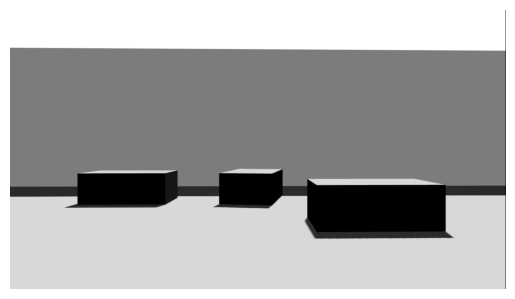

In [13]:
import matplotlib.pyplot as plt

# 이미지를 BGR에서 RGB로 변환 (matplotlib는 RGB 이미지를 사용합니다)
resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

# 이미지를 matplotlib를 사용해 표시
plt.imshow(resized_img_rgb)
plt.axis('off')  # 축을 숨기려면 사용
plt.show()

In [14]:

# 리사이즈된 이미지 저장 (선택적)
output_path = '/home/kmg/ros2_image_save_code/resized_output_image.png'
cv2.imwrite(output_path, resized_img)

True

In [1]:
import ffmpeg

def convert_webm_to_mp4(input_file: str, output_file: str):
    try:
        ffmpeg.input(input_file).output(output_file, vf="scale=1352:1736").run()
        print(f"Conversion successful: {output_file}")
    except ffmpeg.Error as e:
        print(f"Error occurred during conversion: {e.stderr.decode('utf8')}")

# 예시 사용법
input_path = '/home/kmg/Videos/스크린캐스트/gazebo_cpu.webm'  # 변환할 WEBM 파일의 경로
output_path = '/home/kmg/gazebo_cpu.mp4'  # 변환된 MP4 파일의 경로

convert_webm_to_mp4(input_path, output_path)


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Conversion successful: /home/kmg/gazebo_cpu.mp4
